# Setting up environment

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
sys.path.insert(0, os.path.abspath("../nsforest/nsforesting"))
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import nsforest as ns
from nsforest import utils
from nsforest import preprocessing as pp
from nsforest import nsforesting
from nsforest import evaluating
from nsforest import plotting as pl
from IPython.display import Image

# Data Exploration

In [2]:
# Loading h5ad
data_folder = "../demo_data/"
file = data_folder + "adata_layer1.h5ad"
adata = sc.read_h5ad(file)
adata

AnnData object with n_obs × n_vars = 871 × 16497
    obs: 'cluster'

In [3]:
cluster_header = "cluster"

In [4]:
# Looking at sample labels (obs_names)
adata.obs_names

Index(['A01_1_Nuclei_NeuNP_H200_1025_MTG_layer1_BCH9',
       'A01_BCH3_1NeuNP_H200.1030_MTG_Layer_1',
       'A02_BCH1_1NeuNP_H200.1025_MTG_layer_1',
       'A03_1_Nuclei_NeuNP_H200_1025_MTG_layer1_BCH9',
       'A04_1_Nuclei_NeuNP_H200_1025_MTG_layer1_BCH9',
       'A04_BCH1_1NeuNP_H200.1025_MTG_layer_1',
       'A04_BCH3_1NeuNP_H200.1030_MTG_Layer_1',
       'A05_1_Nuclei_NeuNP_H200_1025_MTG_layer1_BCH9',
       'A05_BCH1_1NeuNP_H200.1025_MTG_layer_1',
       'A05_BCH3_1NeuNP_H200.1030_MTG_Layer_1',
       ...
       'P09_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH7',
       'P09_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH9',
       'P09_1_Nuclei_NeuNN_H200_1030_MTG_layer1_BCH8',
       'P09_BCH1_1NeuNN_H200.1025_MTG_layer_1',
       'P10_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH6',
       'P10_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH9',
       'P10_BCH1_1NeuNN_H200.1025_MTG_layer_1',
       'P11_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH7',
       'P11_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH9',


In [5]:
# Looking at genes (var_names)
# Note: you can change the var.index to be ensembl id or gene name
# adata.var_names = adata.var["feature_name"]
adata.var_names

Index(['A1CF', 'A2M', 'A2M_AS1', 'A2ML1', 'A2ML1_AS1', 'A2MP1', 'A3GALT2',
       'A4GALT', 'AAAS', 'AACS',
       ...
       'ZUFSP', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=16497)

In [6]:
# Checking cell annotation sizes 
adata.obs[cluster_header].value_counts()

e1_e299_SLC17A7_L5b_Cdh13     299
i1_i90_COL5A2_Ndnf_Car4        90
i2_i77_LHX6_Sst_Cbln4          77
i3_i56_BAGE2_Ndnf_Cxcl14       56
i4_i54_MC4R_Ndnf_Cxcl14        54
g1_g48_GLI3_Astro_Gja1         48
i5_i47_TRPC3_Ndnf_Car4         47
i6_i44_GPR149_Vip_Mybpc1       44
i7_i31_CLMP_Ndnf_Cxcl14        31
g2_g27_APBB1IP_Micro_Ctss      27
i8_i27_SNCG_Vip_Mybpc1         27
i9_i22_TAC3_Vip_Mybpc1         22
g3_g18_GPNMB_OPC_Pdgfra        18
i10_i16_TSPAN12_Vip_Mybpc1     16
g4_g9_MOG_Oligo_Opalin          9
i11_i6_EGF_Vip_Mybpc1           6
Name: cluster, dtype: int64

# Preprocessing

In [7]:
cluster_header = "cluster"
medians_header = "medians_" + cluster_header
binary_scores_header = "binary_scores_" + cluster_header

         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Users\bpeng\AppData\Local\anaconda3\Lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


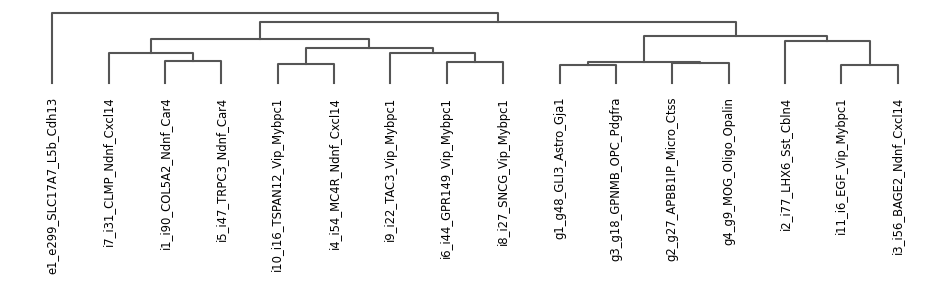

AnnData object with n_obs × n_vars = 871 × 16497
    obs: 'cluster'
    uns: 'dendrogram_cluster'
    obsm: 'X_pca'

In [8]:
# Running scanpy dendrogram
ns.pp.dendrogram(adata, cluster_header, save = "_" + cluster_header + ".png") 

In [9]:
# Calculating cluster medians per gene
ns.pp.prep_medians(adata, cluster_header, use_mean = False, positive_genes_only = True) 

Calculating medians...


Calculating medians (means) per cluster: 100%|█████████████████████████████████████████| 16/16 [00:00<00:00, 55.69it/s]


Saving calculated medians as adata.varm.medians_cluster
--- 0.29226064682006836 seconds ---
Only positive genes selected. 11688 positive genes out of 16497 total genes


AnnData object with n_obs × n_vars = 871 × 11688
    obs: 'cluster'
    uns: 'dendrogram_cluster'
    obsm: 'X_pca'
    varm: 'medians_cluster'

In [10]:
# Calculating binary scores per gene per cluster
ns.pp.prep_binary_scores(adata, cluster_header, medians_header)
adata

Calculating binary scores...


Calculating binary scores per cluster: 100%|███████████████████████████████████████████| 16/16 [01:18<00:00,  4.90s/it]


Saving calculated binary scores as adata.varm.binary_scores_cluster
--- 78.71559691429138 seconds ---
median: 0.0
mean: 0.1428629848824932
std: 0.23137174460615756


AnnData object with n_obs × n_vars = 871 × 16497
    obs: 'cluster'
    uns: 'dendrogram_cluster'
    obsm: 'X_pca'
    varm: 'medians_cluster', 'binary_scores_cluster'

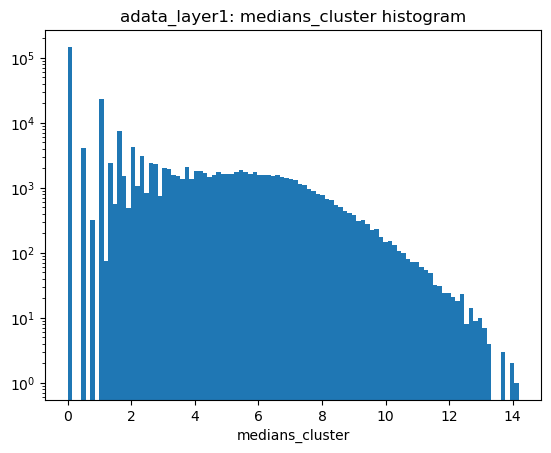

In [11]:
a = plt.hist(adata.varm[medians_header].unstack(), bins = 100)
a = plt.title(f'{file.split("/")[-1].replace(".h5ad", "")}: {medians_header} histogram')
a = plt.xlabel(medians_header)
a = plt.yscale("log")
plt.show()

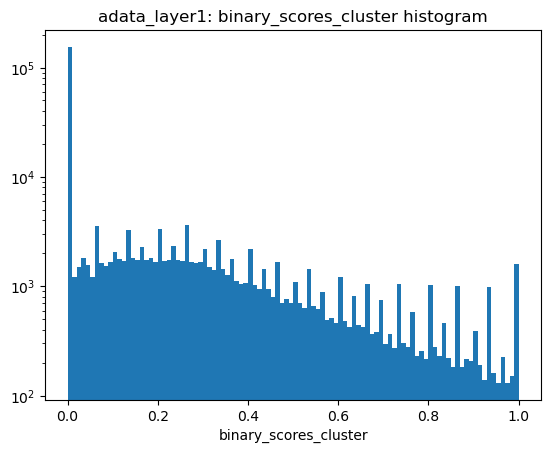

In [12]:
a = plt.hist(adata.varm[binary_scores_header].unstack(), bins = 100)
a = plt.title(f'{file.split("/")[-1].replace(".h5ad", "")}: {binary_scores_header} histogram')
a = plt.xlabel(binary_scores_header)
a = plt.yscale("log")
plt.show()

In [13]:
# Saving as new h5ad
filename = file.replace(".h5ad", "_preprocessed.h5ad")
print(f"Saving new anndata object as...\n{filename}")
adata.write_h5ad(filename)

Saving new anndata object as...
../demo_data/adata_layer1_preprocessed.h5ad


In [14]:
outputfilename_prefix = cluster_header
output_folder = "../outputs_layer1/"

# Running NSForest

##### Note: Skip if input marker list csv is included

In [15]:
# Adding this line to actually subset to positive genes if running NSForest
adata = ns.pp.prep_medians(adata, cluster_header, use_mean = True, positive_genes_only = True) 
results = nsforesting.NSForest(adata, cluster_header, medians_header, binary_scores_header, 
                               output_folder = output_folder, outputfilename_prefix = outputfilename_prefix)

Calculating medians...
use_mean is True. Using the mean expression of each gene per cluster. 


Calculating medians (means) per cluster: 100%|████████████████████████████████████████| 16/16 [00:00<00:00, 102.18it/s]

Saving calculated medians as adata.varm.medians_cluster
--- 0.16356277465820312 seconds ---
Only positive genes selected. 16419 positive genes out of 16497 total genes


Preparing adata...
--- 0.002991914749145508 seconds ---
Pre-selecting genes based on binary scores...
	 Threshold (mean + 2 * std): 0.6069627661813182
	Average number of genes after gene_selection in each cluster: 1077.125
Saving number of genes selected per cluster as...
../outputs_layer1/cluster_gene_selection.csv
Number of clusters to evaluate: 16


running NSForest on all clusters:   0%|                                                         | 0/16 [00:00<?, ?it/s]

1 out of 16:
	e1_e299_SLC17A7_L5b_Cdh13
	 Pre-selected 2029 genes to feed into Random Forest.


running NSForest on all clusters:   6%|███                                              | 1/16 [00:07<01:53,  7.59s/it]

	['TESPA1', 'SATB2']
	fbeta: 0.9850034083162916
2 out of 16:
	g1_g48_GLI3_Astro_Gja1
	 Pre-selected 727 genes to feed into Random Forest.


running NSForest on all clusters:  12%|██████▏                                          | 2/16 [00:10<01:10,  5.04s/it]

	['LINC00498']
	fbeta: 0.9500000000000001
3 out of 16:
	g2_g27_APBB1IP_Micro_Ctss
	 Pre-selected 485 genes to feed into Random Forest.


running NSForest on all clusters:  19%|█████████▏                                       | 3/16 [00:13<00:52,  4.04s/it]

	['CSF2RA', 'ADAM28']
	fbeta: 0.9756097560975611
4 out of 16:
	g3_g18_GPNMB_OPC_Pdgfra
	 Pre-selected 453 genes to feed into Random Forest.


running NSForest on all clusters:  25%|████████████▎                                    | 4/16 [00:16<00:43,  3.63s/it]

	['GPNMB', 'OLIG2']
	fbeta: 0.8620689655172413
5 out of 16:
	g4_g9_MOG_Oligo_Opalin
	 Pre-selected 693 genes to feed into Random Forest.


running NSForest on all clusters:  31%|███████████████▎                                 | 5/16 [00:20<00:38,  3.53s/it]

	['ST18']
	fbeta: 1.0
6 out of 16:
	i10_i16_TSPAN12_Vip_Mybpc1
	 Pre-selected 1445 genes to feed into Random Forest.


running NSForest on all clusters:  38%|██████████████████▍                              | 6/16 [00:24<00:38,  3.89s/it]

	['TSPAN12', 'CHRNB3']
	fbeta: 0.8035714285714286
7 out of 16:
	i11_i6_EGF_Vip_Mybpc1
	 Pre-selected 2393 genes to feed into Random Forest.


running NSForest on all clusters:  44%|█████████████████████▍                           | 7/16 [00:28<00:34,  3.88s/it]

	['EGF', 'NRG3_AS1']
	fbeta: 0.7142857142857143
8 out of 16:
	i1_i90_COL5A2_Ndnf_Car4
	 Pre-selected 477 genes to feed into Random Forest.


running NSForest on all clusters:  50%|████████████████████████▌                        | 8/16 [00:32<00:31,  3.89s/it]

	['COL5A2', 'FREM1']
	fbeta: 0.8870967741935484
9 out of 16:
	i2_i77_LHX6_Sst_Cbln4
	 Pre-selected 520 genes to feed into Random Forest.


running NSForest on all clusters:  56%|███████████████████████████▌                     | 9/16 [00:37<00:28,  4.13s/it]

	['LHX6']
	fbeta: 0.8166189111747851
10 out of 16:
	i3_i56_BAGE2_Ndnf_Cxcl14
	 Pre-selected 308 genes to feed into Random Forest.


running NSForest on all clusters:  62%|██████████████████████████████                  | 10/16 [00:40<00:24,  4.06s/it]

	['BAGE2', 'SYT10']
	fbeta: 0.78125
11 out of 16:
	i4_i54_MC4R_Ndnf_Cxcl14
	 Pre-selected 408 genes to feed into Random Forest.


running NSForest on all clusters:  69%|█████████████████████████████████               | 11/16 [00:44<00:19,  3.89s/it]

	['ARHGAP36', 'ADAM33', 'FAM19A4']
	fbeta: 0.8707865168539326
12 out of 16:
	i5_i47_TRPC3_Ndnf_Car4
	 Pre-selected 1519 genes to feed into Random Forest.


running NSForest on all clusters:  75%|████████████████████████████████████            | 12/16 [00:50<00:17,  4.41s/it]

	['NTNG1', 'EYA4']
	fbeta: 0.9064327485380117
13 out of 16:
	i6_i44_GPR149_Vip_Mybpc1
	 Pre-selected 670 genes to feed into Random Forest.


running NSForest on all clusters:  81%|███████████████████████████████████████         | 13/16 [00:54<00:13,  4.44s/it]

	['FLT1', 'GPR149']
	fbeta: 0.7916666666666666
14 out of 16:
	i7_i31_CLMP_Ndnf_Cxcl14
	 Pre-selected 1599 genes to feed into Random Forest.


running NSForest on all clusters:  88%|██████████████████████████████████████████      | 14/16 [00:59<00:09,  4.52s/it]

	['PAX6', 'TGFBR2']
	fbeta: 0.9009009009009009
15 out of 16:
	i8_i27_SNCG_Vip_Mybpc1
	 Pre-selected 2031 genes to feed into Random Forest.


running NSForest on all clusters:  94%|█████████████████████████████████████████████   | 15/16 [01:04<00:04,  4.80s/it]

	['SNCG', 'EDNRA']
	fbeta: 0.759493670886076
16 out of 16:
	i9_i22_TAC3_Vip_Mybpc1
	 Pre-selected 1477 genes to feed into Random Forest.


running NSForest on all clusters: 100%|████████████████████████████████████████████████| 16/16 [01:09<00:00,  4.36s/it]


	['MCTP2', 'VWC2L_IT1']
	fbeta: 0.7051282051282052
Saving supplementary table as...
../outputs_layer1/cluster_supplementary.csv
Saving markers table as...
../outputs_layer1/cluster_markers.csv
Saving results table as...
../outputs_layer1/cluster_results.csv
using median


Calculating medians (means) per cluster: 100%|████████████████████████████████████████| 16/16 [00:00<00:00, 356.51it/s]

Saving final results table as...
../outputs_layer1/cluster_results.csv
--- 69.85787081718445 seconds ---


In [16]:
results

clusterName  clusterSize   f_score       PPV   TN  FP  FN  \
0    e1_e299_SLC17A7_L5b_Cdh13          299  0.985003  0.989726  569   3  10   
1       g1_g48_GLI3_Astro_Gja1           48  0.950000  1.000000  823   0  10   
2    g2_g27_APBB1IP_Micro_Ctss           27  0.975610  1.000000  844   0   3   
3      g3_g18_GPNMB_OPC_Pdgfra           18  0.862069  1.000000  853   0   8   
4       g4_g9_MOG_Oligo_Opalin            9  1.000000  1.000000  862   0   0   
5   i10_i16_TSPAN12_Vip_Mybpc1           16  0.803571  0.900000  854   1   7   
6        i11_i6_EGF_Vip_Mybpc1            6  0.714286  1.000000  865   0   4   
7      i1_i90_COL5A2_Ndnf_Car4           90  0.887097  1.000000  781   0  35   
8        i2_i77_LHX6_Sst_Cbln4           77  0.816619  0.838235  783  11  20   
9     i3_i56_BAGE2_Ndnf_Cxcl14           56  0.781250  0.961538  814   1  31   
10     i4_i54_MC4R_Ndnf_Cxcl14           54  0.870787  1.000000  817   0  23   
11      i5_i47_TRPC3_Ndnf_Car4           47  0.906433  1.000000  824   0  16   
12    i6_i44_GPR149_Vip_Mybpc1           44  0.791667  1.000000  827   0  25   
13     i7_i31_CLMP_Ndnf_Cxcl14           31  0.900901  1.000000  840   0  11   
14      i8_i27_SNCG_Vip_Mybpc1           27  0.759494  0.923077  843   1  15   
15      i9_i22_TAC3_Vip_Mybpc1           22  0.705128  0.785714  846   3  11   

     TP  marker_count             NSForest_markers  \
0   289             2              [TESPA1, SATB2]   
1    38             1                  [LINC00498]   
2    24             2             [CSF2RA, ADAM28]   
3    10             2               [GPNMB, OLIG2]   
4     9             1                       [ST18]   
5     9             2            [TSPAN12, CHRNB3]   
6     2             2              [EGF, NRG3_AS1]   
7    55             2              [COL5A2, FREM1]   
8    57             1                       [LHX6]   
9    25             2               [BAGE2, SYT10]   
10   31             3  [ARHGAP36, ADAM33, FAM19A4]   
11   31             2                [NTNG1, EYA4]   
12   19             2               [FLT1, GPR149]   
13   20             2               [PAX6, TGFBR2]   
14   12             2                [SNCG, EDNRA]   
15   11             2           [MCTP2, VWC2L_IT1]   

                                         binary_genes  onTarget  
0   [SLC17A7, TBR1, LINC00507, KIAA1211L, TESPA1, ...  0.421602  
1   [LINC00498, FGFR3, EMX2OS, SLC7A11, F3, RANBP3...  1.000000  
2   [INPP5D, PLCG2, CSF2RA, ADAM28, FLI1, CD74, SY...  1.000000  
3   [GPNMB, STK32A, COL20A1, OLIG2, KLRC3, B3GNT7,...  1.000000  
4   [ST18, MOBP, CNDP1, FOLH1, MOG, CD22, TF, CERC...  1.000000  
5   [TSPAN12, LINC01539, TMC5, CHRNB3, FAM46A, ANG...  0.783762  
6   [KCNJ2_AS1, EGF, ZSCAN23, TEKT1, STK11IP, NRG3...  0.892726  
7   [NMBR, COL5A2, SST, NPNT, NDNF, FREM1, FAT1, G...  0.556021  
8   [LHX6, FLT3, TAC1, CALB1, TRBC2, RSPO3, GRIK3,...  1.000000  
9   [BAGE2, SCN5A, GREM2, SYT10, ARHGAP18, GRB14, ...  0.602383  
10  [ARHGAP36, MC4R, COBLL1, LINC01435, ADAM33, FA...  0.420466  
11  [SSTR2, KIRREL, NTNG1, TARID, EYA4, CA2, TACR1...  0.380471  
12  [PLCE1_AS1, FLT1, CXCL12, SLC22A3, GPR149, SHI...  0.811541  
13  [FGF10, KIAA1644, CLMP, PAX6, SP8, TGFBR2, WIF...  0.547845  
14  [SNCG, MMRN2, EDNRA, FBN3, KCNK2, SCML4, SAMD5...  1.000000  
15  [BSPRY, MCTP2, OFD1P10Y, OFD1P15Y, OFD1P9Y, VW...  0.883928

# Evaluating input marker list

In [17]:
# Getting dictionary of markers (format: {cluster: marker_list})
markers = pd.read_csv("../outputs_layer1/cluster_results.csv")
markers_dict = utils.prepare_markers(markers, "clusterName", "NSForest_markers")

In [18]:
outputfilename_prefix = "marker_eval"
results = evaluating.DecisionTree(adata, cluster_header, medians_header, markers_dict, combinations = False, use_mean = False, 
                                  output_folder = output_folder, outputfilename_prefix = outputfilename_prefix)

Preparing data...
--- 0.00398707389831543 seconds ---
Number of clusters to evaluate: 16
1 out of 16:
	e1_e299_SLC17A7_L5b_Cdh13
	marker genes to be evaluated: ['TESPA1', 'SATB2']
	['TESPA1', 'SATB2']
	f-beta:0.9850034083162916
	PPV:0.9897260273972602
2 out of 16:
	g1_g48_GLI3_Astro_Gja1
	marker genes to be evaluated: ['LINC00498']
	['LINC00498']
	f-beta:0.9500000000000001
	PPV:1.0
3 out of 16:
	g2_g27_APBB1IP_Micro_Ctss
	marker genes to be evaluated: ['CSF2RA', 'ADAM28']
	['CSF2RA', 'ADAM28']
	f-beta:0.9756097560975611
	PPV:1.0
4 out of 16:
	g3_g18_GPNMB_OPC_Pdgfra
	marker genes to be evaluated: ['GPNMB', 'OLIG2']
	['GPNMB', 'OLIG2']
	f-beta:0.8620689655172413
	PPV:1.0
5 out of 16:
	g4_g9_MOG_Oligo_Opalin
	marker genes to be evaluated: ['ST18']
	['ST18']
	f-beta:1.0
	PPV:1.0
6 out of 16:
	i10_i16_TSPAN12_Vip_Mybpc1
	marker genes to be evaluated: ['TSPAN12', 'CHRNB3']
	['TSPAN12', 'CHRNB3']
	f-beta:0.8035714285714286
	PPV:0.9
7 out of 16:
	i11_i6_EGF_Vip_Mybpc1
	marker genes to be eval

Calculating medians (means) per cluster: 100%|████████████████████████████████████████| 16/16 [00:00<00:00, 485.67it/s]

Saving final results table as...
../outputs_layer1/marker_eval_results.csv
--- 0.5076773166656494 seconds ---


In [19]:
results

clusterName  clusterSize   f_score       PPV   TN  FP  FN  \
0    e1_e299_SLC17A7_L5b_Cdh13          299  0.985003  0.989726  569   3  10   
1       g1_g48_GLI3_Astro_Gja1           48  0.950000  1.000000  823   0  10   
2    g2_g27_APBB1IP_Micro_Ctss           27  0.975610  1.000000  844   0   3   
3      g3_g18_GPNMB_OPC_Pdgfra           18  0.862069  1.000000  853   0   8   
4       g4_g9_MOG_Oligo_Opalin            9  1.000000  1.000000  862   0   0   
5   i10_i16_TSPAN12_Vip_Mybpc1           16  0.803571  0.900000  854   1   7   
6        i11_i6_EGF_Vip_Mybpc1            6  0.714286  1.000000  865   0   4   
7      i1_i90_COL5A2_Ndnf_Car4           90  0.887097  1.000000  781   0  35   
8        i2_i77_LHX6_Sst_Cbln4           77  0.816619  0.838235  783  11  20   
9     i3_i56_BAGE2_Ndnf_Cxcl14           56  0.781250  0.961538  814   1  31   
10     i4_i54_MC4R_Ndnf_Cxcl14           54  0.870787  1.000000  817   0  23   
11      i5_i47_TRPC3_Ndnf_Car4           47  0.906433  1.000000  824   0  16   
12    i6_i44_GPR149_Vip_Mybpc1           44  0.791667  1.000000  827   0  25   
13     i7_i31_CLMP_Ndnf_Cxcl14           31  0.900901  1.000000  840   0  11   
14      i8_i27_SNCG_Vip_Mybpc1           27  0.759494  0.923077  843   1  15   
15      i9_i22_TAC3_Vip_Mybpc1           22  0.705128  0.785714  846   3  11   

     TP  marker_count                      markers  onTarget  
0   289             2              [TESPA1, SATB2]  0.421602  
1    38             1                  [LINC00498]  1.000000  
2    24             2             [CSF2RA, ADAM28]  1.000000  
3    10             2               [GPNMB, OLIG2]  1.000000  
4     9             1                       [ST18]  1.000000  
5     9             2            [TSPAN12, CHRNB3]  0.783762  
6     2             2              [EGF, NRG3_AS1]  0.892726  
7    55             2              [COL5A2, FREM1]  0.556021  
8    57             1                       [LHX6]  1.000000  
9    25             2               [BAGE2, SYT10]  0.602383  
10   31             3  [ARHGAP36, ADAM33, FAM19A4]  0.420466  
11   31             2                [NTNG1, EYA4]  0.380471  
12   19             2               [FLT1, GPR149]  0.811541  
13   20             2               [PAX6, TGFBR2]  0.547845  
14   12             2                [SNCG, EDNRA]  1.000000  
15   11             2           [MCTP2, VWC2L_IT1]  0.883928

# Plotting

In [20]:
ns.pl.boxplot_fscore(results, False, output_folder, outputfilename_prefix)

In [21]:
ns.pl.boxplot_ppv(results, False, output_folder, outputfilename_prefix)

In [22]:
ns.pl.boxplot_ontarget(results, False, output_folder, outputfilename_prefix)

In [23]:
ns.pl.scatter_w_clusterSize_fscore(results, False, output_folder, outputfilename_prefix)

In [24]:
ns.pl.scatter_w_clusterSize_ppv(results, False, output_folder, outputfilename_prefix)

In [25]:
ns.pl.scatter_w_clusterSize_ontarget(results, False, output_folder, outputfilename_prefix)

In [26]:
# If you want to specify dendrogram order
dendrogram = list(adata.uns["dendrogram_" + cluster_header]["categories_ordered"])
if dendrogram: # https://stackoverflow.com/questions/23482668/sorting-by-a-custom-list-in-pandas
    results["clusterName"] = results["clusterName"].astype("category")
    results["clusterName"] = results["clusterName"].cat.set_categories(dendrogram)
    results = results.sort_values("clusterName")

In [27]:
if "markers" in list(results.columns): 
    markers_dict = dict(zip(results["clusterName"], results["markers"]))
elif "NSForest_markers" in list(results.columns): 
    markers_dict = dict(zip(results["clusterName"], results["NSForest_markers"]))

Saving...
 marker_eval.png


C:\Users\bpeng\AppData\Local\anaconda3\Lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



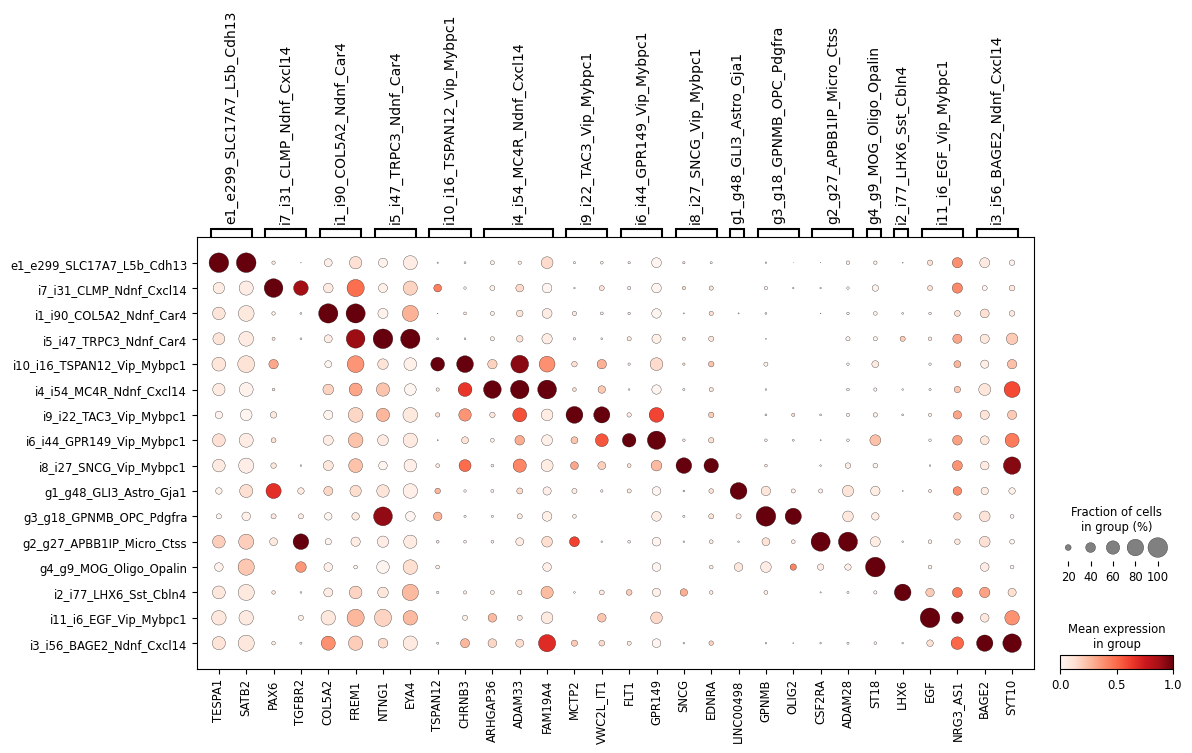

In [31]:
ns.pl.dotplot(adata, markers_dict, cluster_header, dendrogram, True, output_folder, outputfilename_prefix)

Saving...
 marker_eval.png


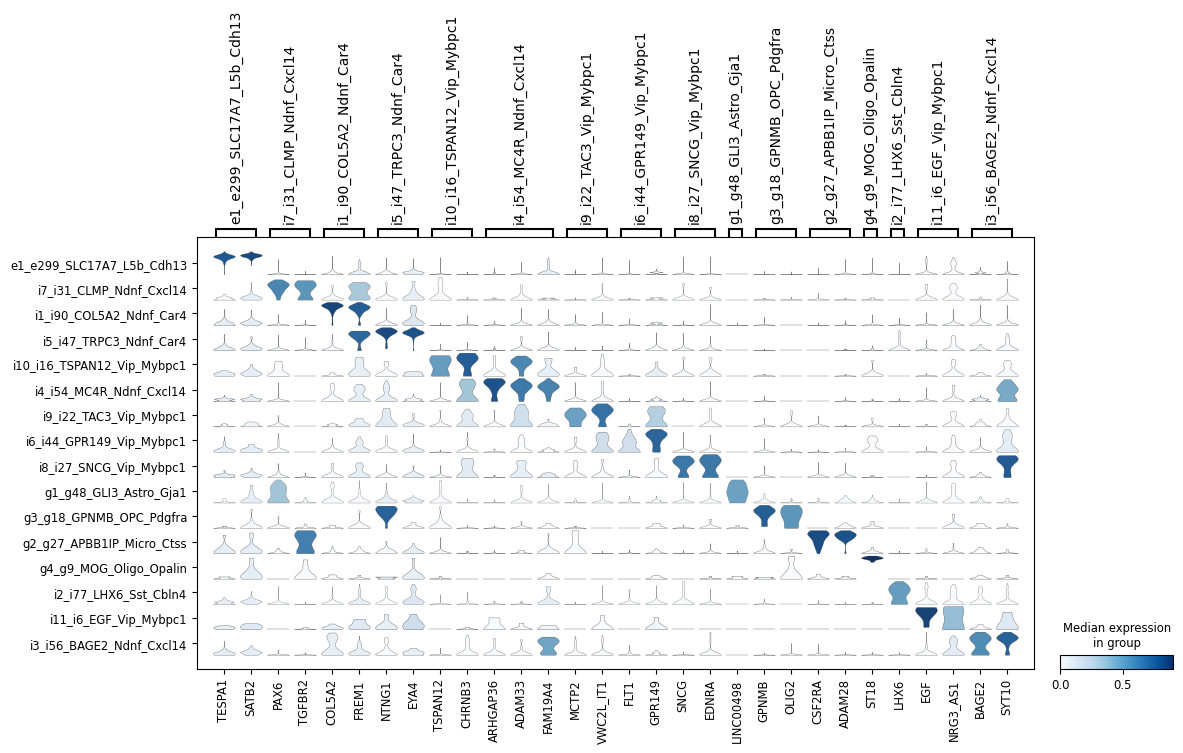

In [32]:
ns.pl.stackedviolin(adata, markers_dict, cluster_header, dendrogram, True, output_folder, outputfilename_prefix)

Saving...
 marker_eval.png


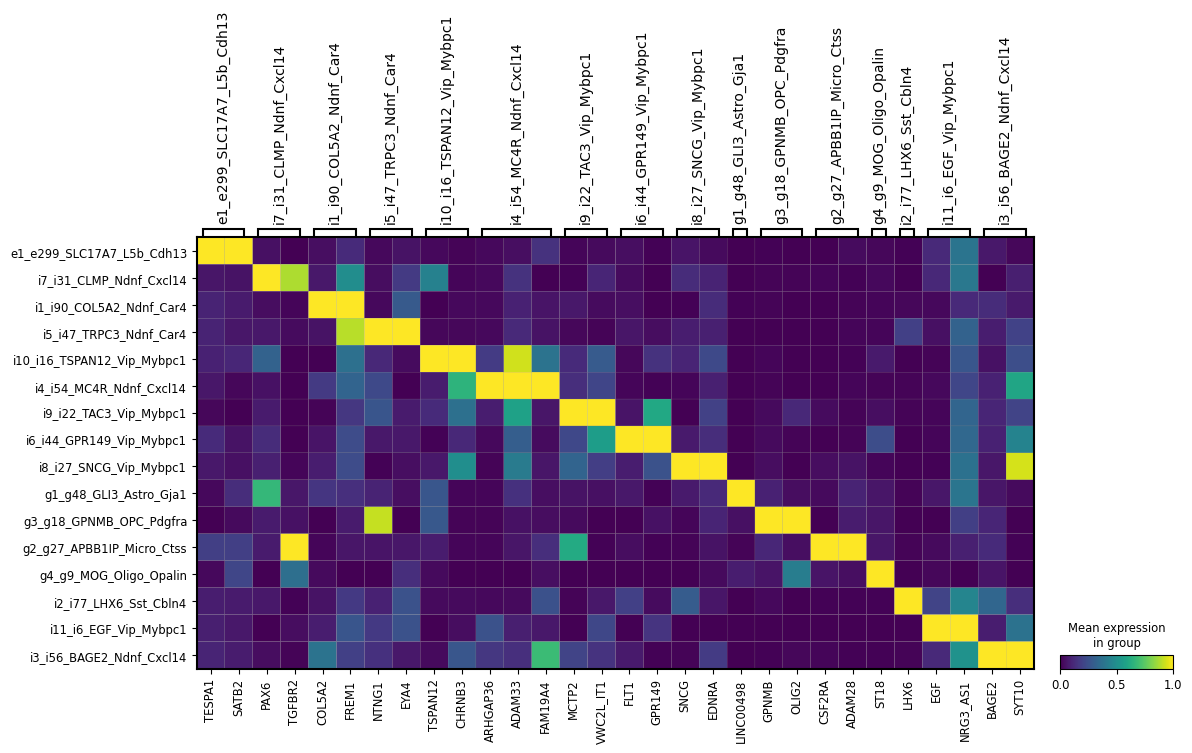

In [33]:
ns.pl.matrixplot(adata, markers_dict, cluster_header, dendrogram, True, output_folder, outputfilename_prefix)